[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%206/6.1_gym_frozen_lake.ipynb)

In [ ]:
# 필요한 패키지 임포트
import gym
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 프로즌 레이크 환경을 만듭니다.
# 환경을 이해하기 위해 미끄럼 옵션은 끄고 만듭니다.
env = gym.make('FrozenLake-v0', is_slippery=False)
print('환경은 ? ', env)
print('행동할수 있는 액션의 수는 ? ', env.action_space)
print('이동할 수 있는 총 상태의 수는 ? ', env.observation_space)
print('초기화할 경우 시작 위치는 ? ', env.reset())
print('행동을 하고나서 리턴해주는 값은 ? ', env.step(1))

환경은 ?  <TimeLimit<FrozenLakeEnv<FrozenLake-v0>>>
행동할수 있는 액션의 수는 ?  Discrete(4)
이동할 수 있는 총 상태의 수는 ?  Discrete(16)
초기화할 경우 시작 위치는 ?  0
행동을 하고나서 리턴해주는 값은 ?  (4, 0.0, False, {'prob': 1.0})


In [ ]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


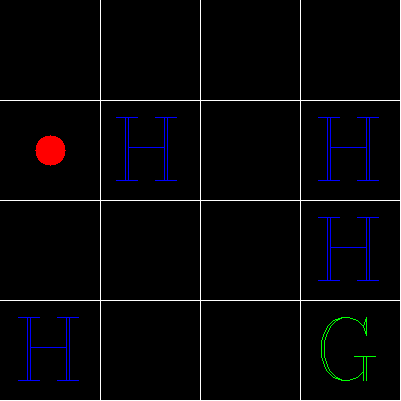

In [ ]:
def draw_state(state):
    img = np.zeros((401, 401, 3))
    # 배경
    for i in range(4):
        cv2.line(img, ((i+1)*100, 0), ((i+1)*100, 400), (255, 255, 255), 1)
        cv2.line(img, (0, (i+1)*100), (400, (i+1)*100), (255, 255, 255), 1)
    cv2.putText(img, 'H', (1*100+10, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 2*100+80), cv2.FONT_HERSHEY_COMPLEX,
                3, (255, 0, 0))
    cv2.putText(img, 'H', (0*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'G', (3*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (0, 255, 0))
    
    # Agent 위치 표시
    row = state//4
    col = state%4
    cv2.circle(img, (col*100+50, row*100+50), 15, (0, 0, 255), -1)
    return img

cv2_imshow(draw_state(4))

In [ ]:
# 시작할때 게임이 아직 끝나지 않았다고 설정
d = False
# 환경을 초기화 해주고, 초기 상태를 s라고 저장해 두자
s = env.reset()
# 게임이 끝날때까지 반복하자
while not d:
    # 임의의 행동을 하나 뽑고, step함수로 액션을 수행한다
    # 그 다음 상태를 n_s, 액션에 대한 보상을 r 게임이 끝났는지 알려주는 
    # 변수를 d, 정보는 _로 저장하자.
    n_s, r, d, _ = env.step(env.action_space.sample())
# 게임이 끝나고, r=1 이면 성공 아니면 실패를 출력해 주자.
if (r == 1):
    print('Success')
else:
    print('Fail')

Fail


In [ ]:
# 저장을 위한 준비를 하자
fcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('frozen_lake_random.avi', fcc, 1.0, (401, 401))
# 시작할때 게임이 아직 끝나지 않았다고 설정
d = False
# 환경을 초기화 해주고, 초기 상태를 s라고 저장해 두자
s = env.reset()
# 게임이 끝날때까지 반복하자
while not d:
    # 현재 상태를 저장하자.
    out.write(np.uint8(draw_state(s)))
    # 임의의 행동을 하나 뽑고, step함수로 액션을 수행한다
    # 그 다음 상태를 n_s, 액션에 대한 보상을 r 게임이 끝났는지 알려주는 
    # 변수를 d, 정보는 _로 저장하자. 
    n_s, r, d, _ = env.step(env.action_space.sample())
    # 다음 상태를 현재 상태로 바꾸자
    s = n_s
# while 문을 빠져 나와 상태를 한번 더 그려주자
out.write(np.uint8(draw_state(s)))
# 게임이 끝나고, r=1 이면 성공 아니면 실패를 출력해 주자.
if (r == 1):
    print('Success')
else:
    print('Fail')

# 동영상을 저장하자
out.release()

Fail
